Text(0.5, 1.0, 'Gramian Angular Difference Field')

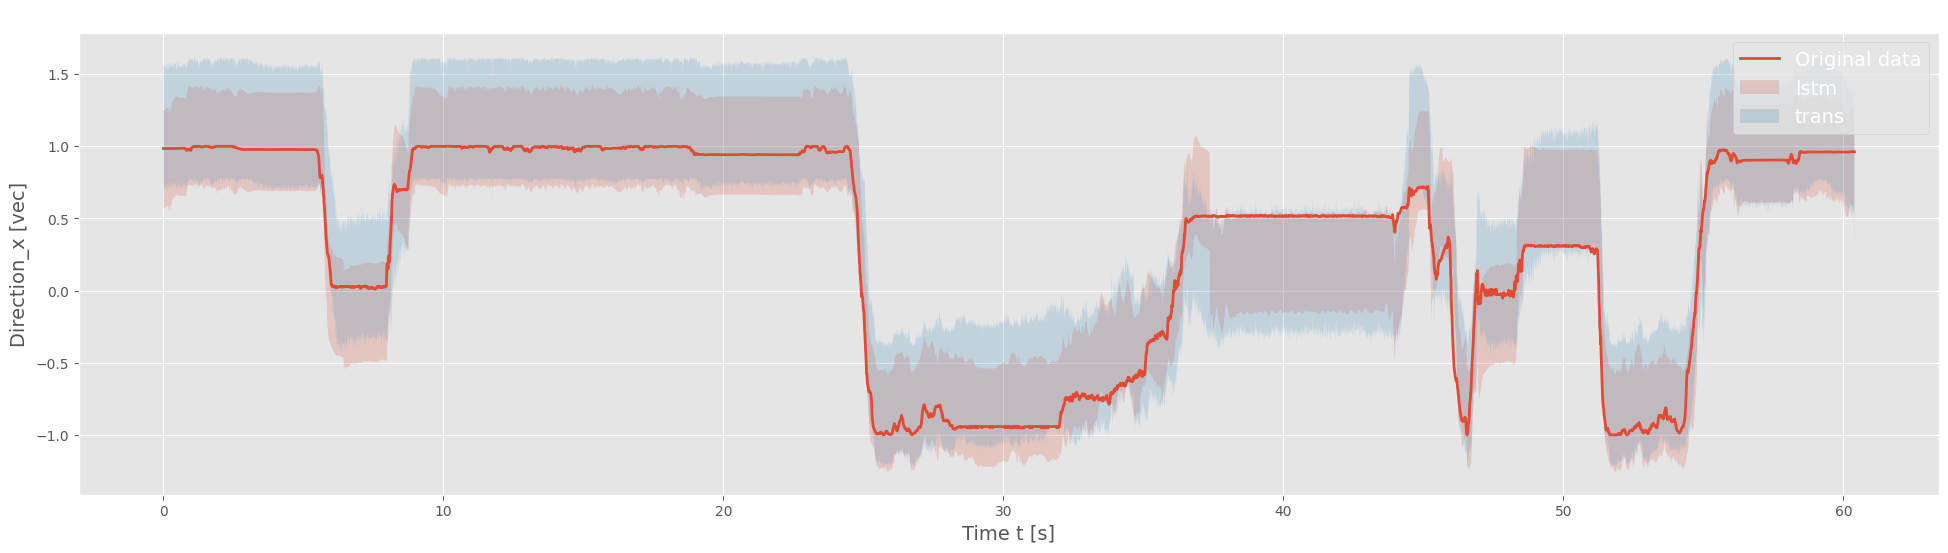

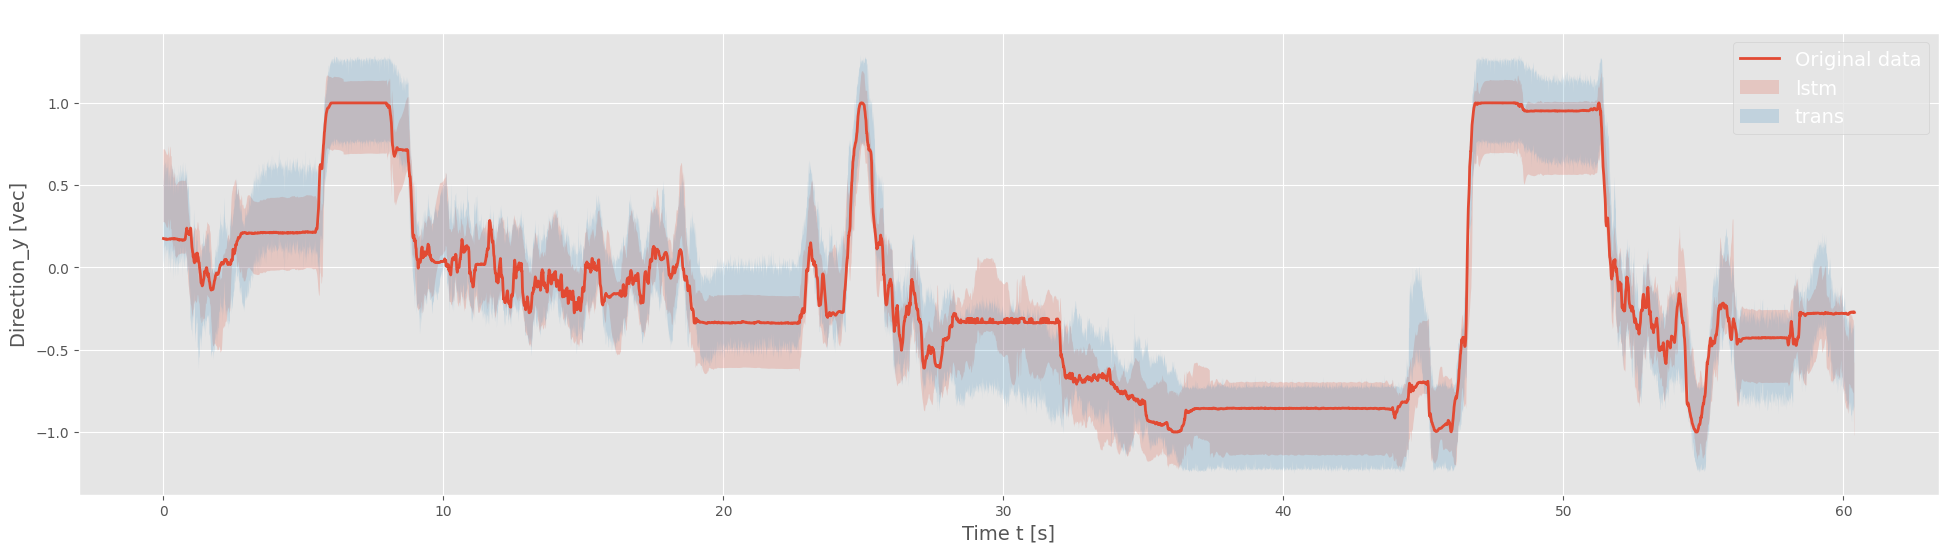

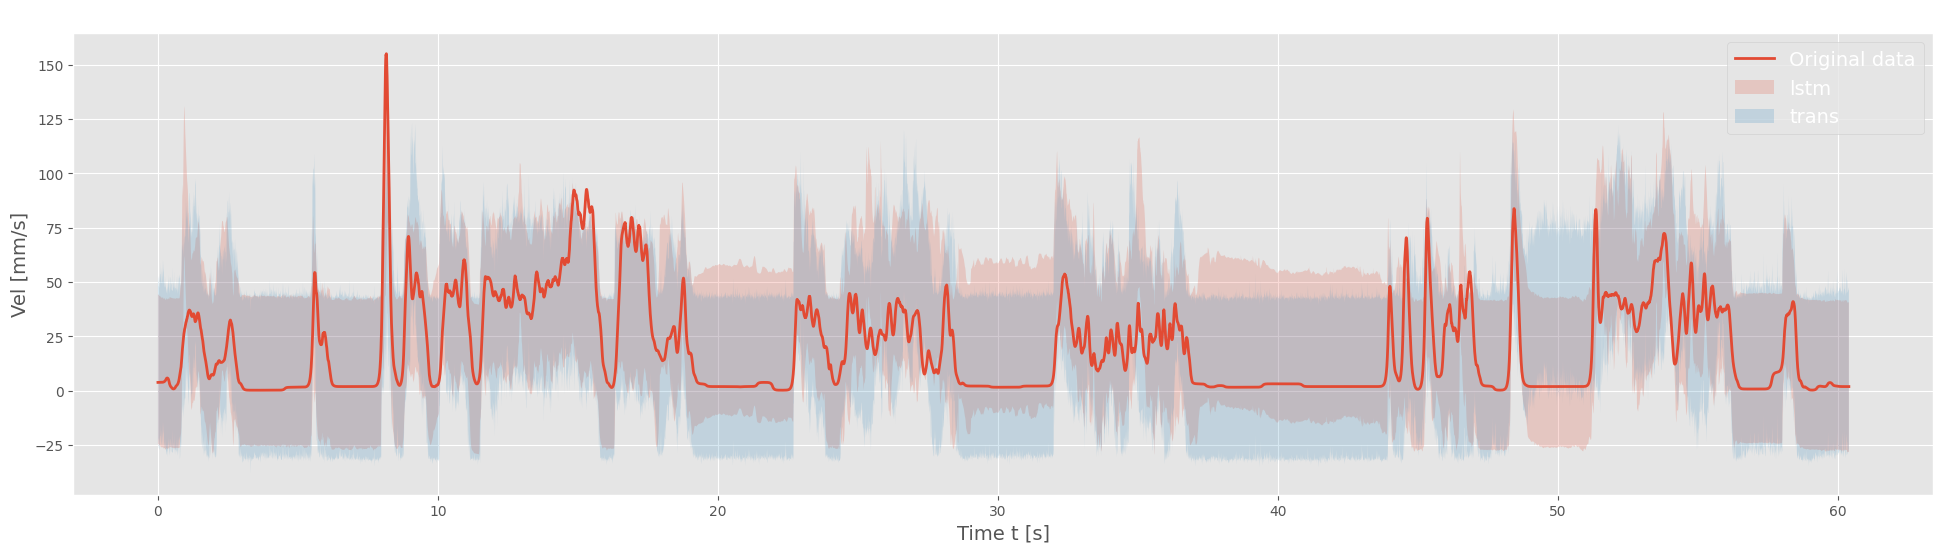

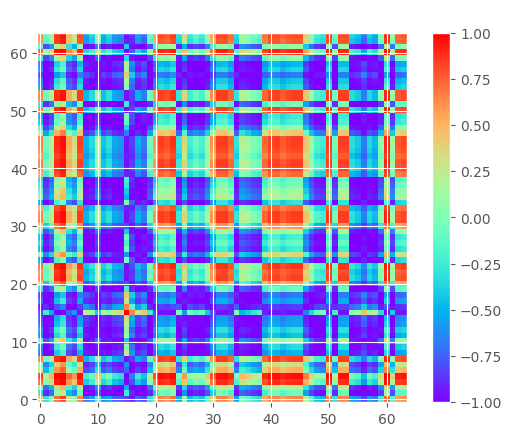

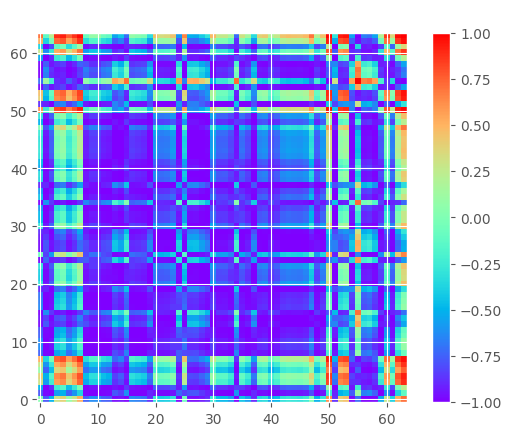

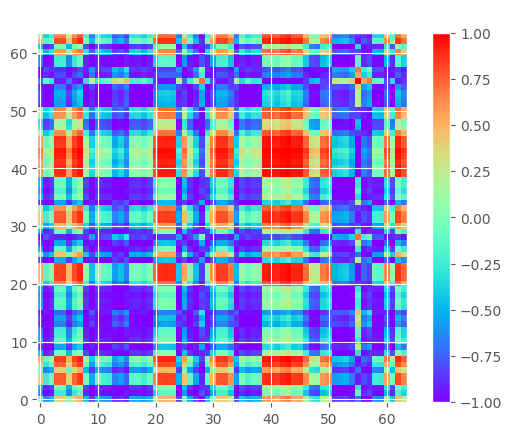

In [7]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

def intervals_bounds(pred, label):
    confidence_level = 0.95
    residuals = label - pred

    # Calculate the prediction intervals using quantiles
    lower_quantile = (1 - confidence_level) / 2
    upper_quantile = 1 - lower_quantile
    lower_bounds = np.quantile(residuals, lower_quantile) + pred
    upper_bounds = np.quantile(residuals, upper_quantile) + pred
    return lower_bounds, upper_bounds

fold_path = os.getcwd() 
# model_type = "trans" # ["lstm","hlstm","arx","trans"]
window_size = 100
time_step = 1
cricket_number = "c16"
input_pattern = "pattern1" # ["pattern1(All)","pattern2(ThC+2FTi hind leg)","pattern3(THC)"]

def pred_intervals_direction(fold_path, window_size, time_step, cricket_number, input_pattern):
    names = globals()
    for model_type in ["lstm","hlstm","arx","trans"]:
        # get the directon data from the csv file
        direction_path = fold_path + "/Evaluation/Results/"+ model_type+"_"+str(window_size)+"_"+str(time_step)+"_"+cricket_number+"_Direction_"+input_pattern+".csv"
        direction = pd.read_csv(direction_path, usecols=[1,2,3,4])
        direction = np.array(direction)
        names[model_type+"_pred_direction_x"], names[model_type+"_pred_direction_y"] = direction[:,0], direction[:,1]
        names[model_type+"_label_direction_x"], names[model_type+"_label_direction_y"] = direction[:,2], direction[:,3]
        # pred_direction_x, pred_direction_y = direction[:,0], direction[:,1]
        # label_direction_x, label_direction_y = direction[:,2], direction[:,3]

        end = len(eval("lstm_label_direction_x")) * 1/119.88
        t_test = np.arange(0, end, 1/119.88) 
        names[model_type+"_lower_bounds_x"], names[model_type+"_upper_bounds_x"] = intervals_bounds(eval(model_type+"_pred_direction_x"), eval(model_type+"_label_direction_x"))
        names[model_type+"_lower_bounds_y"], names[model_type+"_upper_bounds_y"] = intervals_bounds(eval(model_type+"_pred_direction_y"), eval(model_type+"_label_direction_y"))

    plt.figure(figsize=(24, 6))
    plt.plot(t_test, eval("lstm_label_direction_x"), label="Original data", linewidth=2)
    for model_type in ["lstm","trans"]:
        plt.fill_between(t_test, eval(model_type+"_lower_bounds_x"), eval(model_type+"_upper_bounds_x"), alpha=0.2, label=model_type)
        plt.xlabel('Time t [s]',fontsize=14)
        plt.ylabel('Direction_x [vec]',fontsize=14)
        plt.title('Direction_x_'+cricket_number,fontsize=14)
        plt.legend(fontsize=14)

    plt.figure(figsize=(24, 6))
    plt.plot(t_test, eval("lstm_label_direction_y"), label='Original data', linewidth=2)
    for model_type in ["lstm","trans"]:
        plt.fill_between(t_test, eval(model_type+"_lower_bounds_y"), eval(model_type+"_upper_bounds_y"), alpha=0.2, label=model_type)
        plt.xlabel('Time t [s]',fontsize=14)
        plt.ylabel('Direction_y [vec]',fontsize=14)
        plt.title('Direction_y_'+cricket_number,fontsize=14)
        plt.legend(fontsize=14)

def pred_intervals_vel(fold_path, window_size, time_step, cricket_number, input_pattern):
    names = globals()
    for model_type in ["lstm","hlstm","arx","trans"]:
        # get the vel data from the csv file
        vel_path = fold_path + "/Evaluation/Results/"+ model_type+"_"+str(window_size)+"_"+str(time_step)+"_"+cricket_number+"_Vel_"+input_pattern+".csv"
        vel = pd.read_csv(vel_path, usecols=[1,2,3,4,5,6])
        vel = np.array(vel)
        names[model_type+"_pred_vel"], names[model_type+"_pred_vel_x"], names[model_type+"_pred_vel_y"] = vel[:,0], vel[:,1], vel[:,2]
        names[model_type+"_label_vel"], names[model_type+"_label_vel_x"], names[model_type+"_label_vel_y"] = vel[:,3], vel[:,4], vel[:,5]

        end = len(eval("lstm_label_vel")) * 1/119.88
        t_test = np.arange(0, end, 1/119.88)
        names[model_type+"_lower_bounds_vel"], names[model_type+"_upper_bounds_vel"] = intervals_bounds(eval(model_type+"_pred_vel"), eval(model_type+"_label_vel"))
    
    plt.figure(figsize=(24, 6))
    plt.plot(t_test, eval("lstm_label_vel"), label="Original data", linewidth=2) 
    for model_type in ["lstm","trans"]:
        plt.fill_between(t_test, eval(model_type+"_lower_bounds_vel"), eval(model_type+"_upper_bounds_vel"), alpha=0.2, label=model_type)
        plt.xlabel('Time t [s]',fontsize=14)
        plt.ylabel('Vel [mm/s]',fontsize=14)
        plt.title('Vel_'+cricket_number,fontsize=14)
        plt.legend(fontsize=14)

pred_intervals_direction(fold_path, window_size, time_step, cricket_number, input_pattern)
pred_intervals_vel(fold_path, window_size, time_step, cricket_number, input_pattern)

import numpy as np
from pyts.image import GramianAngularField

plt.figure()
gadf = GramianAngularField(image_size=64)
gadf_image = gadf.fit_transform(eval("lstm_label_vel").reshape(1, -1))
plt.imshow(gadf_image[0], cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Gramian Angular Difference Field')

plt.figure()
gadf = GramianAngularField(image_size=64)
gadf_image = gadf.fit_transform(eval("lstm_pred_vel").reshape(1, -1))
plt.imshow(gadf_image[0], cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Gramian Angular Difference Field')

plt.figure()
gadf = GramianAngularField(image_size=64)
gadf_image = gadf.fit_transform(eval("trans_pred_vel").reshape(1, -1))
plt.imshow(gadf_image[0], cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Gramian Angular Difference Field')

/tmp/ipykernel_52376/3414930824.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


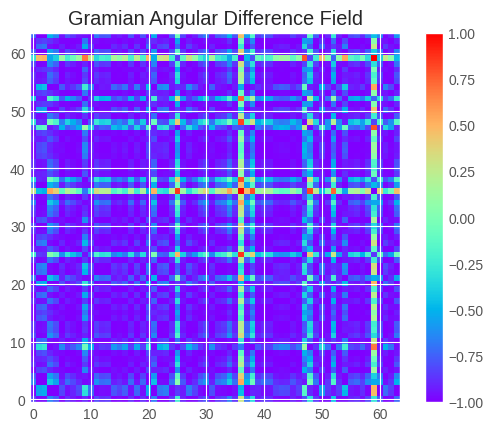

In [21]:
import numpy as np
from pyts.image import GramianAngularField

# Generate a sample time series data
time_series = np.random.randn(100)

# Initialize the GADF transformer
gadf = GramianAngularField(image_size=64)

# Transform the time series into a GADF image
gadf_image = gadf.fit_transform(time_series.reshape(1, -1))

# Plot the GADF image
import matplotlib.pyplot as plt

plt.imshow(gadf_image[0], cmap='rainbow', origin='lower')
plt.colorbar()
plt.title('Gramian Angular Difference Field')
plt.show()